In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import keras
np.random.seed(1)   

Using TensorFlow backend.


=================================================================================================================
# Neural Networks in Practice: Keras


##### D.Vidotto, Data Mining: JBI030 2019/2020


=================================================================================================================


In this notebook, we are going to see how to setup and train Feedforward Neural Networks with the [Keras](https://keras.io/) deep learning library. Keras has two possible backends,  [Tensorflow](https://www.tensorflow.org/) and [Theano](http://deeplearning.net/software/theano/).  For this notebook we will use the Tensorflow version, and therefore Tensorflow is also required to run the code in the notebook. As of now (February 2020) Tensorflow is not supported in Python 3.8 (although a new release supported by Python 3.8 is expected in March 2020). Therefore, in order to run the code in the notebook you need to use Python 3.7 or earlier version. 

scikit-learn also supports methods for Neural Networks; examples of code with scikit-learn can be found in the notebook "Neural Networkds in Practice: scikit-learn". 

Here, we are going to set up Neural Networks for the following topics:

1. Regression 
1. Classification
  * Binary Classification
  * Multiclass Classification
1. Interfacing Keras with scikit-learn for network tuning

This notebook is used with the following versions of Python and Keras (and Tensorflow 2.1.0): 

In [2]:
# Python version
import platform; print(platform.python_version())

3.7.4


In [3]:
# Keras version
print(keras.__version__)

2.3.1


## 1. Regression
For the regression example, we will use the [Boston Houses dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). The data contains information collected by the U.S Census Service concerning housing in Boston; the sample size is 506, and there are 13 features. The target variable is the median value of houses in different areas of Boston. More information about the dataset can be found [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Let's load the data: 

In [4]:
from sklearn.datasets import load_boston
bunch_data = load_boston()
bunch_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# Feature names 
bunch_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X, y = bunch_data.data, bunch_data.target
X.shape

(506, 13)

**Some preprocessing**...

In [7]:
# Train-test split (separate 10% of the data for the test set)
from sklearn.model_selection import train_test_split
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [8]:
# Another split for the validation set (10% of the new dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, test_size=0.1, random_state=1)

In [9]:
X_train[:5]

array([[5.44520e-01, 0.00000e+00, 2.18900e+01, 0.00000e+00, 6.24000e-01,
        6.15100e+00, 9.79000e+01, 1.66870e+00, 4.00000e+00, 4.37000e+02,
        2.12000e+01, 3.96900e+02, 1.84600e+01],
       [1.05393e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.93500e+00, 2.93000e+01, 4.49860e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.86850e+02, 6.58000e+00],
       [7.85700e-01, 2.00000e+01, 3.97000e+00, 0.00000e+00, 6.47000e-01,
        7.01400e+00, 8.46000e+01, 2.13290e+00, 5.00000e+00, 2.64000e+02,
        1.30000e+01, 3.84070e+02, 1.47900e+01],
       [3.25430e-01, 0.00000e+00, 2.18900e+01, 0.00000e+00, 6.24000e-01,
        6.43100e+00, 9.88000e+01, 1.81250e+00, 4.00000e+00, 4.37000e+02,
        2.12000e+01, 3.96900e+02, 1.53900e+01],
       [1.20742e+00, 0.00000e+00, 1.95800e+01, 0.00000e+00, 6.05000e-01,
        5.87500e+00, 9.46000e+01, 2.42590e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 2.92290e+02, 1.44300e+01]])

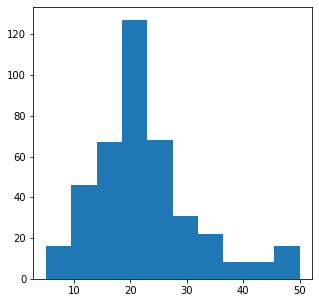

In [10]:
# Histogram of the target
plt.figure(figsize=(5,5))
plt.hist(y_train)
plt.show()

In [11]:
# Rescale data with min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_valid_scaled = mms.transform(X_valid)
X_test_scaled =mms.transform(X_test)

**Setting the Regression FNN**. We are now going to use Keras to set up a Regression NN. Let's review the components of a Regression network: 
* the input layer contains as many neurons as the number of features
* as we are predicting just one continuous output, we can set up the network with one output layer
* the loss function is the mean squared error 
* no activation function is used for the output layer

In Keras, you build the network with the `models.Sequential()` function, which takes as input the layers you want to include in the network. In turn, these layers are declared sequentially, with the `layers.Dense` function. Here, we are going to create a simple network with one hidden layer containing 5 hidden neurons and one output layer. The first hidden layer will be given the ReLU activation function, and it also needs the number of neurons of the input layer:   

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])

The last layer is the output layer; it doesn't specify any activation function, and it is indeed composed of just 1 neuron in this example. Moreover, besides the ReLU function you can choose other activations from the Keras library. [Here](https://keras.io/activations/) you can find a list of activation function available in Keras. 

An alternative, equivalent way to specify the network just created is the following one: 

```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))
```

We will only train networks with one layer in this example; if you want to add layers you can do as follows (here we add a second hidden layer with 4 neurons and ReLU activation): 

```python
model = keras.models.Sequential([
    keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])
```

or, alternatively:

```python
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1))
```

...and so on. As you can see, adding a layer is as easy as adding a line of code. 


Let's go back to our single-layer model, and get a list of its (hidden and output) layers: 

In [13]:
model.layers

We can also get the layers name or fetch them by index: 

In [14]:
hidden1 = model.layers[0]     # Use model.layers[1] for the output layer 
hidden1.name

'dense_1'

We can see how weights and biases are initialized: 

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 3.4500921e-01,  5.8017135e-02,  2.9814649e-01,  2.9226756e-01,
         5.4160845e-01],
       [ 4.2473042e-01, -1.4750713e-01, -4.4800287e-01, -5.1457298e-01,
         2.3564065e-01],
       [ 4.1132069e-01,  1.4079702e-01,  4.8360717e-01, -3.1908926e-01,
        -5.1186383e-02],
       [-2.9594600e-01, -3.9225459e-02, -2.9463777e-01, -3.7478381e-01,
         6.9240510e-02],
       [-5.1224232e-01,  2.3711658e-01, -5.4733098e-02, -3.0457562e-01,
         2.7155495e-01],
       [-3.4767610e-01, -4.4668612e-01,  4.7552896e-01, -4.9084458e-01,
         1.3802874e-01],
       [-1.9538987e-01, -3.5431072e-01, -3.2166567e-01,  4.4577003e-01,
        -2.1970055e-01],
       [-9.3907744e-02,  4.5959616e-01,  8.7464452e-02,  1.0315555e-01,
        -2.1910092e-01],
       [-5.2398902e-01,  3.1235868e-01, -2.8578433e-01, -9.7421408e-03,
         2.9641128e-01],
       [-4.9400330e-04,  6.2059700e-02,  4.3593729e-01,  3.5691756e-01,
         2.2118855e-01],
       [-1.3550258e-01, -1.321

In [16]:
biases # Initialized at 0 

array([0., 0., 0., 0., 0.], dtype=float32)

The next step that needs to be performed is the compilation of the model, which defines the loss function, performance metrics, and optimization method of the model. In this example, we use the MSE both as a loss function and as the evaluation metric, in which case we don't need to specify the `metrics` option (if, for example, you want to use the MAE as metric, you can simply add the option `metrics=["mae"]` to the inputs of the `compile` function). For optimization, we will use Stochastic Gradient Descent (technically the mini-batch version) as optimizer.

In [17]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In this [link](https://keras.io/metrics/) you can find the available metrics in Keras; in [this one](https://keras.io/losses/), you can find the available losses; and in [this](https://keras.io/optimizers/), the available optimizers. 

The model is now ready to be trained. To do this, we use the `fit` function (exactly as in scikit-learn), to which we can also pass other hyperparameters such as the number of epochs and the batch size for mini-batch gradient descent (indicated with $n_B$ in the theoretical notebook of Neural Networks). Furthermore, we can indicate a validation set to assess model performance. (This argument is optional, but highly recommended to help with model tuning). If you didn't create a validation set before, you can alternatively let Keras create it before training; to achieve this, use the `validation_split` argument of `fit` (this has to be a float be between 0 and 1), denoting the ratio of units to randomly split as a validation set.    

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_valid_scaled, y_valid), verbose=0)

We can plot the training and validation MSE observed at each epoch: 

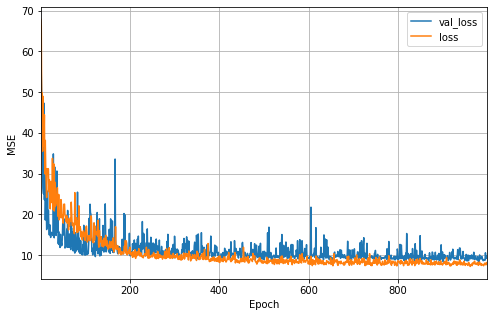

In [19]:
pd.DataFrame(history.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

The model seems to have converged, without overfitting. Let's assess now how to explore the output of the Keras model. Here we can obtain a summary of the model:

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


Let's now check the estimates of the weights and biases of the hidden layer: 

In [21]:
hidden0 = model.layers[0]
weights, biases = hidden1.get_weights()
weights.shape   # Shape: n.features x n.nodes 

(13, 5)

In [22]:
weights

array([[  0.39586022,  -1.3965946 ,   0.02745466,  -3.0985963 ,
         -4.774773  ],
       [ -1.1492051 ,   0.06476866,  -0.5094994 ,  -0.32451457,
          0.53492266],
       [  0.8083154 ,   0.45100728,   1.2954806 ,   0.09208159,
          0.47569904],
       [ -0.7439928 ,   0.31776437,  -0.6883689 ,   0.15028778,
          0.5030628 ],
       [ -2.1004004 ,  -4.0892043 ,  -0.11636277,  -0.70726097,
         -2.4464087 ],
       [ -2.8046834 ,  -2.6861882 ,   8.862835  ,   4.2580667 ,
          0.05489183],
       [ -1.0692184 ,   5.0049076 ,  -0.7177499 ,  -1.69726   ,
         -0.9026026 ],
       [  0.51035804, -10.745302  ,  -0.06063677,  -1.3544239 ,
         -1.915006  ],
       [ -2.022579  ,   2.8751047 ,  -2.0021107 ,   0.74168605,
          1.3019769 ],
       [ -0.24542502,   0.49112397,  -2.4183533 ,  -0.9556505 ,
         -1.2456515 ],
       [ -2.6645422 ,  -0.9323434 ,  -2.1411583 ,  -1.9317623 ,
         -0.93130386],
       [  1.817475  ,   0.9988836 ,  -1.832

In [23]:
biases

array([ 2.7319481 , -1.101117  , -0.24770424,  4.2602057 ,  4.710392  ],
      dtype=float32)

If you have the `pydot` library installed, you can visualize your model: 

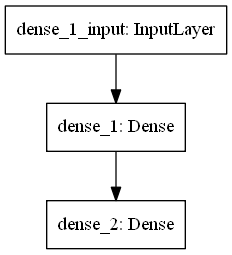

In [24]:
keras.utils.plot_model(model, to_file="./img/neural_networks/keras_model.png")

The network hyperparameters can be retrieved via: 

In [25]:
history.params

{'batch_size': 32,
 'epochs': 1000,
 'steps': None,
 'samples': 409,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

Let's now assess model performance on the test set: 

In [26]:
mse_test = model.evaluate(X_test_scaled, y_test)
mse_test

51/51 [==============================] - 0s 137us/step


6.476306522593779

Let's now see how to perform predictions; we will use the first 5 units of the test set: 

In [27]:
y_pred = model.predict(X_test_scaled[:5])
y_pred

array([[26.609444],
       [23.78115 ],
       [19.127851],
       [20.119244],
       [19.274319]], dtype=float32)

#### Other Hyperparameters. 

**Learning Rate**. To set the learning rate, simply initialize a `optimizer.SGD` object and set a learning rate: 

In [28]:
sgd_optimizer = keras.optimizers.SGD(lr=1e-4)

If we re-compile the model just estimated and re-train it, the model will continue the training from the current state of the weights and biases (this is call "warm start"). If you want to re-train the model from scratch, you should create a new one. Let's continue the training of the neural network, with the new learning rate (the model is compiled with the optimizer just created): 

In [29]:
model.compile(loss="mean_squared_error", optimizer=sgd_optimizer)
history_2 = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_valid_scaled, y_valid), verbose=0)

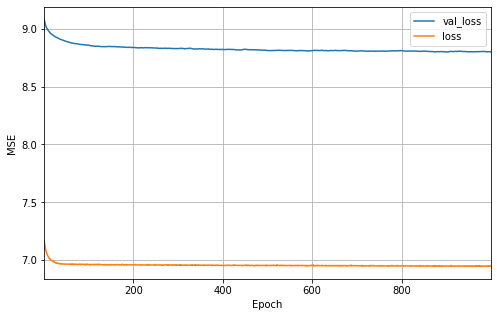

In [30]:
# Because of the warm start, the loss starts already at low values 
pd.DataFrame(history_2.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [31]:
mse_test_2 = model.evaluate(X_test_scaled, y_test)
mse_test_2

51/51 [==============================] - 0s 98us/step


6.150179432887657

This model performs worse than the first one, a sign that the learning rate (or the number of epochs) did not improve performance. 

**Momentum**. Setting the momentum is also very easy; you can just add the `momentum` hyperparameter to the `optimizers.SGD` object.

In [32]:
sgd_momentum_optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9)

Where `momentum` is the momentum hyperparameter. You can give such object as input of the `optimizer` argument in phase of model compilation, as done above. 

**Adam Optimizer**. The ADAM optimizer can be selected via: 

In [33]:
adam_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)  

This time, `beta_1` and `beta_2` refer to the first and second momdent hyperparameters of ADAM. Once again, you can pass this optimizer as input of the `compile` method. 

**$l_2$, $l_1$ regularization**. The $l_2$ regularization parameter can be set for each layer, when creating the model. The larger this parameter, the simpler the model will be (i.e., the closer the final weights will be to 0). Here is an example of a model built with two layers, both with $l_2$-regularized weights (the output layer is also regularized): 

In [34]:
model_regularized = keras.models.Sequential()
model_regularized.add(keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:], 
                     kernel_regularizer=keras.regularizers.l2(0.01)))
model_regularized.add(keras.layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model_regularized.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01)))

In [35]:
model_regularized.compile(loss="mean_squared_error", optimizer=adam_optimizer)
history_3 = model_regularized.fit(X_train_scaled, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_valid_scaled, y_valid), verbose=0)

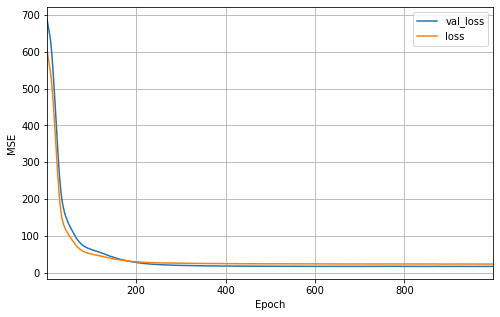

In [36]:
pd.DataFrame(history_3.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [37]:
mse_test_3 = model_regularized.evaluate(X_test_scaled, y_test)
mse_test_3

51/51 [==============================] - 0s 137us/step


20.95019011404

In this case, the performance of the model on the test set drops (which means the $l_2$ regularizer should be tuned better). [Other regularizers](https://keras.io/regularizers/) available on Keras are:
* keras.regularizers.l1 for $l_1$ regularization (the larger its hyperparameter, the sparser the network)
* keras.regularizers.l1_l2 for a combination of $l_1$ and $l_2$ regularization. 

**Early Stopping**. To set early stopping, you should set a Keras [callback](https://keras.io/callbacks/); this is simply a function that you declare before training, and that Keras will compute during the training stage. The callback for early stopping requires a `patience` hyperparameters, which says for how many epochs after the best validation metric has been observed the algorithm should continue, and a `restore_best_weights` (set to True) to return the set of weights and biases obtained at the epoch which led to the best validation metric. 

Here is an example of how to set early stopping with Keras, using 10 epochs for the `patience`: 

In [38]:
# Early Stopping (wait 10 iterations with no progress on the validation set)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

And it can be used as follows (we reinitialize a 1-layer model to check how early stopping works): 

In [39]:
# Initialize a new model
model_early_stopping = keras.models.Sequential()
model_early_stopping.add(keras.layers.Dense(5, activation='relu', input_shape=X_train.shape[1:]))
model_early_stopping.add(keras.layers.Dense(1))
model_early_stopping.compile(loss="mean_squared_error", optimizer=adam_optimizer)

The early stopping object must be given as input to the *fit* method: 

In [40]:
history_4 = model_early_stopping.fit(X_train_scaled, y_train, epochs=2500, validation_data=(X_valid_scaled, y_valid),
                                   callbacks=[early_stopping_cb], verbose=0)

As you can see, the model has stopped much than the 2500 epochs given as input: 

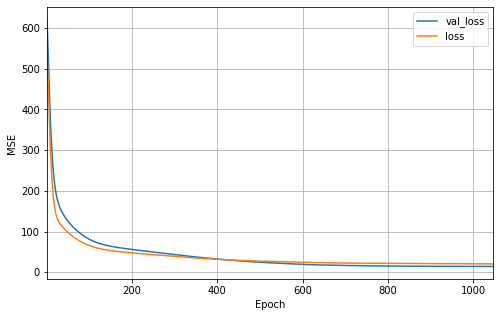

In [41]:
pd.DataFrame(history_4.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

**Saving your model**. You can save your model in the hard disk as follows:

```{python}
model_name.save("my_keras_model.h5")
```

And you can load it in a new session with: 

```{python}
model_name = keras.models.load_model("my_keras_model.h5")
```

## 2. Classification
### 2.1 Binary Classification
For the binary classification case, we use the "circles" dataset already encountered with kernel SVM's. Let's load it and view it again: 

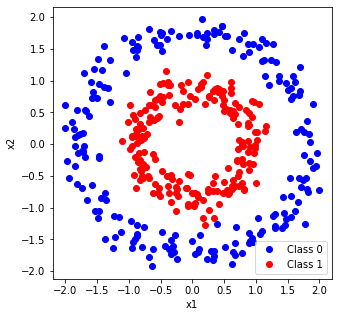

In [42]:
from sklearn.preprocessing import StandardScaler
data_lin_sep_svm = pd.read_csv("./data/neural_networks/circles.csv")
X = data_lin_sep_svm.iloc[:,:2]
y = data_lin_sep_svm["y"]
# This time we don't create a separate validation set but we will exploit the "validation_split" argument 
# of the fit method in Keras
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

plt.figure(figsize=(5,5))
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "bo", label="Class 0")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "ro", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

**Setting Up the network**. Let's review the ingredients of a Neural Network for binary classification: 
* a single output layer 
* cross-entropy for binary classification
* sigmoid activation function for the output layer

Since the classification taks is highly non-linear in this case, we use as an example a network with one hidden layers containing 15 neurons (and ReLU activation function). Let's set the network: 

In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(15, activation="relu", input_shape=X_train_scaled.shape[1:]))
model.add(keras.layers.Dense(1, activation="sigmoid"))

To compile the model, we use the accuracy as performance metric, and `binary_crossentropy` as loss function: 

In [44]:
model.compile(loss="binary_crossentropy", 
              optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999), 
              metrics=["accuracy"])

And now we are ready to train the model: 

In [45]:
# We use 10% of the train set as a validation set: 
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32,
                    validation_split=0.1, verbose=0)

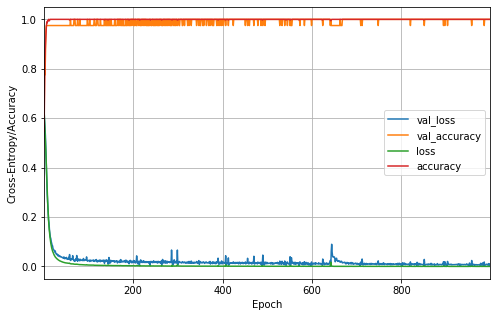

In [46]:
pd.DataFrame(history.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy/Accuracy')
plt.grid(True)
plt.show()

The model seems to have converged quite quickly! Let's assess its performance on the test set: 

In [47]:
model.evaluate(X_test_scaled, y_test) 

100/100 [==============================] - 0s 680us/step


[0.002217177735193554, 1.0]

Which means the loss on the test set is very close to 0, and the accuracy is super! For prediction, we can obtain both the probabilities and the classes:

In [48]:
# Predict probability of class 1 for the first unit of the test set:
y_proba = model.predict(X_test_scaled[1].reshape(1,-1))
y_proba.round(2)

array([[1.]], dtype=float32)

In [49]:
# Predict class for the first unit of the test set:
y_pred = model.predict_classes(X_test_scaled[1].reshape(1,-1))
y_pred 

array([[1]])

Last, as we are in a two-dimensional case, let's plot the model decision boundary: 

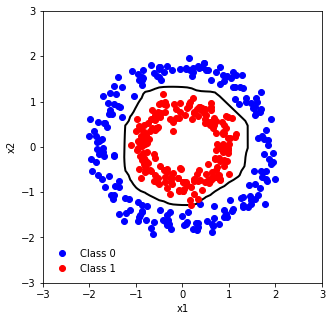

In [50]:
xx, yy = np.meshgrid(np.arange(X_train_scaled[:,0].min(), X_train_scaled[:,0].max(), 0.1),
                     np.arange(X_train_scaled[:,1].min(), X_train_scaled[:,1].max(), 0.1))
zz = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)


plt.figure(figsize=(5,5))
contour = plt.contour(xx, yy, zz, levels=1, alpha=1., vmin=0, vmax=1, linewidths=2, colors='k', linestyles='-')
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "bo", label="Class 0")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "ro", label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.legend(loc=3,  frameon=False)
plt.show()

As an exercise, try to re-run this neural network with the "sigmoid" activation function for the hidden layer. 

### 2.2 Multiclass Classification
For the multiclass case, we see an example with the *iris dataset*. Unlike what done with other algorithms, however, this time we will use the dataset with all 4 original features. 

In [51]:
from sklearn.datasets import load_iris 
X, y = load_iris(return_X_y=True)

In the multi-class case, the output must be one-hot encoded. This can be done with the `OneHotEncoder` function of scikit-learn, or-alternatively- with the `utils.to_categorical` function of Keras: 

In [52]:
y_enc = keras.utils.to_categorical(y)
y_enc[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Let's now split the train/validation/test set and standardize the features:

In [53]:
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(X, y_enc, stratify=y, test_size=0.1, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainvalid, y_trainvalid, stratify=y_trainvalid, 
                                                      test_size=0.1, random_state=1)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_valid_scaled = sc.transform(X_valid)
X_test_scaled = sc.transform(X_test)

**The network**. In the multiclass case, a typical FNN has the following architecture: 
* as many output layers as there are classes (3 in this case)
* cross-entropy loss 
* softmax activation function for the output layer

We are going to build a network with one layer containing 7 neurons, this time activated with the tanh function: 

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(7, activation="tanh", input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(3, activation="softmax")
])

As usual, let's compile and fit the model (using the `categorical_crossentropy` loss, and again the accuracy as metric): 

In [55]:
model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999), 
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32,
                    validation_split=0.1, verbose=0)

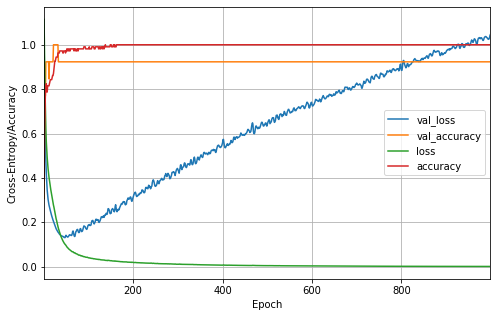

In [56]:
pd.DataFrame(history.history)[1:].plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy/Accuracy')
plt.grid(True)
plt.show()

The model does not perform bad, but it can be improved. For example, you can see that the validation accuracy is about 90% and that the validation cross-entropy degrades with the epoch (maybe an early stopping with tweaking of some other hyperparameters might help in this case; try as an exercise).

Next, let's assess the performance on the test set: 

In [57]:
model.evaluate(X_test_scaled, y_test) 

15/15 [==============================] - 0s 133us/step


[8.136499673128128e-05, 1.0]

Last, the predicted probabilities for each class (for the first test unit):

In [58]:
# Predict probability of class 1 for the first unit of the test set:
y_proba = model.predict(X_test_scaled[1].reshape(1,-1))
y_proba.round(2)

array([[0., 1., 0.]], dtype=float32)

...and the same unit's predicted class:

In [59]:
# Predict class for the first unit of the test set:
y_pred = model.predict_classes(X_test_scaled[1].reshape(1,-1))
y_pred 

array([1], dtype=int64)

## 3. Interfacing Keras with scikit-learn for network tuning

It is possible to interface Keras with scikit-learn to tune the model with cross-validation. Here, we will see an example with the Heart dataset, therefore we are in a binary classification case. However, the implementation for multiclass classification and regression is straightforward. 

We first load the data: 

In [60]:
data_train = pd.read_csv("./data/heart_data/heart_train_processed.csv")
data_test = pd.read_csv("./data/heart_data/heart_test_processed.csv")
X_train = data_train.drop("y", axis=1)
X_test = data_test.drop("y", axis=1)
y_train = data_train["y"]
y_test = data_test["y"]

To start with, we need to wrap the Keras model in scikit-learn. First, we create a function that takes as arguments the hyperparameters that we want to tune (plus the number of neurons in the input layer), and that returns a compiled Keras model. In this case, we use the SGD optimizer, but of course you can use the ADAM or any other optimizer you desire (in addition, you can also decide to tune the type of activation function -here set as ReLU- of the hidden layers, as well as the  $l_1$ and $l_2$ regularizers, by adding these hyperparameters to the arguments of the function): 

In [61]:
def build_binary_model(n_hidden=1, n_neurons=7, learning_rate=1e-3, input_shape=[19]):
    model = keras.models.Sequential()
    # This is an alternative way to declare an input layer: 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # Add as many hidden layers as the ones specified by the model:
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

Next, let's wrap the function:

In [62]:
keras_binary_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_binary_model)

And this is it! We can now use `keras_multi_classifier` as if it was a normal scikit-learn object, with the usual `fit` and `predict` methods. The last arguments of this function can be arguments of the Keras library; in this case, we use the `validation_split` parameter with 5% of the training data, as well as an early stopping callback: 

In [63]:
kmc = keras_binary_classifier.fit(X_train, y_train, epochs=700, validation_split=0.05,
                                 callbacks=[keras.callbacks.EarlyStopping(patience=10)], verbose=0)

With the usual `score` method of scikit-learn, we can assess the performance of the model on the test data: 

In [64]:
keras_binary_classifier.score(X_test, y_test)

61/61 [==============================] - 0s 82us/step


0.7704917788505554

**Tuning with cross-validation**. We are now going to perform tuning with cross-validation. Given the large number of hyperparameters that need to be optimized, we will use random search, rather than Grid Search (which is nonetheless still possible, if you prefer manually specify a grid of value). As it is highly unlikely to find the best setting for a Neural Network with just grid/randomized search methods, a good tip would be to use these methodologies to find a good initial setting for (some of) the hyperparameters, and then manually refine these (and other) hyperparameter, with a validation set. Moreover, for large datasets tuning a Neural Network with cross-validation is not recommended given the large computational costs involved in this operation. 

We are going to perform the random tuning in the following way:
* we will make the algorithm search between 0 and 3 hidden layer (if the best number of hidden layer was 0, we can interpret the result as a sign of linear relationships between the features and the target on this dataset)
* we will choose between 1 and 15 neurons per hidden layer
* we will use a [reciprocal distribution](https://en.wikipedia.org/wiki/Reciprocal_distribution) for the learning rate of SGD; this distribution will range between 1e-4 and 0.99, giving larger probabilities to smaller values
* we will vary the number of epochs (equal to 500, 1000, 2000, or 3000)

The search will occur across 10 iterations (of course, in more intensive analyses you should increase such number). Let's initialize the random grid: 

In [65]:
from scipy.stats import reciprocal    # Reciprocal distribution in scipy.stats
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 15),
    "learning_rate": reciprocal(1e-4, 9.9e-1),
    "epochs": [500, 1000, 2000, 3000]
}

Now we are ready to perform cross-validation (we will use 3-fold CV): 

In [66]:
rnd_search_cv = RandomizedSearchCV(keras_binary_classifier, param_distribs, n_iter=10, cv=3, n_jobs=-1, iid=False, 
                                  random_state=2, verbose=2)
rnd_search_cv.fit(X_train, y_train, verbose=0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018AAC375308>,
          fit_params=None, iid=False, n_iter=10, n_jobs=-1,
          param_distributions={'n_hidden': [0, 1, 2, 3], 'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018AAD8ABE48>, 'epochs': [500, 1000, 2000, 3000]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

The best set of hyperparameters was: 

In [67]:
rnd_search_cv.best_params_

{'epochs': 3000,
 'learning_rate': 0.0010786090301759563,
 'n_hidden': 1,
 'n_neurons': 11}

Keep in mind that increasing the number of ranomized search iterations might yield a different (and more reliable) result. The CV accuracy of this model is:

In [68]:
rnd_search_cv.best_score_

0.8511316974957784

And the accuracy of the best model on the test set:

In [69]:
rnd_search_cv.score(X_test, y_test)

61/61 [==============================] - 0s 311us/step


0.8360655903816223

Last, you can save the Keras model in a separate object, with the `best_estimator_.model` attribute:

In [70]:
model = rnd_search_cv.best_estimator_.model

**Exercise**. As an exercise, try to find the best set of the following hyperparameters (either with Grid-Search, or with random-search), on top of the ones already explored in this last section: 
* $l_2$ regularizer
* activation function for the hidden layers
* momentum 
* number of epochs
* number of batch_size (you can simply add the 'batch_size' key to the dictionary of hyperparameters grid)

If you use randomized search, increase the number of randomized search iterations to search across a larger number of parameter sets (and have a nice walk while you wait for the results...). 